# Ex.10 
## Train a deep MLP on the MNIST dataset

In [21]:
import tensorflow as tf

(x_train_full, y_train_full), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train_full.shape

(60000, 28, 28)

In [22]:
X_valid, y_valid = x_train_full[55000:]/255, y_train_full[55000:]
X_train, y_train = x_train_full[:55000]/255, y_train_full[:55000]
X_test, y_test = x_test/255, y_test

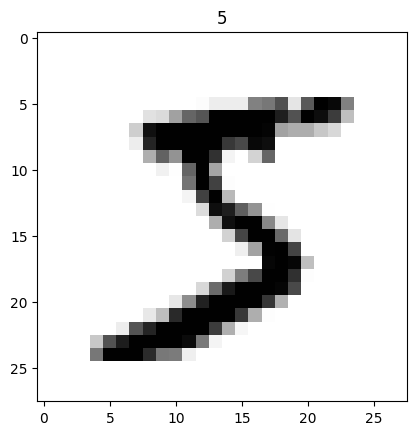

In [24]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap='binary')
plt.title(y_train[0])
plt.show()

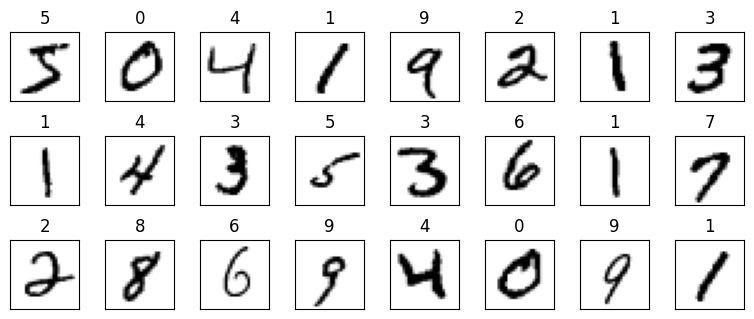

In [38]:
n_rows = 3
n_cols = 8

plt.figure(figsize=(n_cols*1.2, n_rows*1.2))
plt.subplots_adjust(hspace=0.5)

for n, (img, target) in enumerate(zip(X_train[:24], y_train[:24])):
    plt.subplot(n_rows, n_cols, n + 1)
    plt.imshow(img, cmap='binary')
    plt.title(target)
    plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, labelbottom=False, labelleft=False)

In [41]:
K = tf.keras.backend

class ExponentialLearningRate(tf.keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []

    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.learning_rate))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.learning_rate, self.model.optimizer.learning_rate * self.factor)

In [40]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [44]:
# norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")])

optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3)

model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

expon_lr = ExponentialLearningRate(factor=1.005)

In [46]:
history = model.fit(X_train, y_train, epochs=1, validation_data=(X_valid, y_valid),
                    callbacks=[expon_lr])

1719/1719 [==============================] - 5s 3ms/step - loss: nan - accuracy: 0.1015 - val_loss: nan - val_accuracy: 0.0978


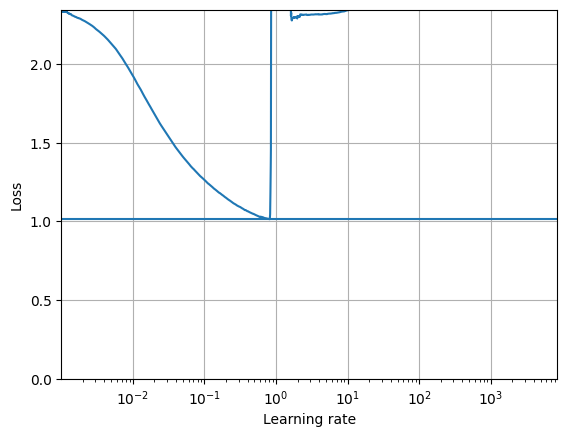

In [48]:
plt.plot(expon_lr.rates, expon_lr.losses)
plt.gca().set_xscale('log')
plt.hlines(min(expon_lr.losses), min(expon_lr.rates), max(expon_lr.rates))
plt.axis([min(expon_lr.rates), max(expon_lr.rates), 0, expon_lr.losses[0]])
plt.grid()
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.show()

In [49]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [50]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")])

optimizer = tf.keras.optimizers.SGD(learning_rate=3e-1)

model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [53]:
from pathlib import Path
run_index = 1 # increment this at every run
run_logdir = Path() / "my_mnist_logs" / "run_{:03d}".format(run_index)
run_logdir

WindowsPath('my_mnist_logs/run_001')

In [54]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=20)
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_mnist_model", save_best_only=True)
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb])

Epoch 1/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2333 - accuracy: 0.9271 - val_loss: 0.0884 - val_accuracy: 0.9730
Epoch 2/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0947 - accuracy: 0.9700 - val_loss: 0.0761 - val_accuracy: 0.9780
Epoch 3/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0671 - accuracy: 0.9779 - val_loss: 0.0808 - val_accuracy: 0.9780
Epoch 4/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0485 - accuracy: 0.9844 - val_loss: 0.0707 - val_accuracy: 0.9798
Epoch 5/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0345 - accuracy: 0.9889 - val_loss: 0.0710 - val_accuracy: 0.9818
Epoch 6/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0283 - accuracy: 0.9903 - val_loss: 0.1034 - val_accuracy: 0.9746
Epoch 7/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0240 - accuracy: 0.9921 - val_loss: 0.0883 - val_ac

In [55]:
model = tf.keras.models.load_model("my_mnist_model") # rollback to best model
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0733 - accuracy: 0.9785


[0.07329230010509491, 0.9785000085830688]

## sth